# Plots for Vis Example Section of BB Paper

In [1]:
from __future__ import division
from __future__ import absolute_import
from __future__ import print_function
import os
import six.moves.cPickle as pkl
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator, ScalarFormatter
#from bb.tools.hist_tools_modified import hist, poisson_error
from skhep.visual import MplPlotter as skh_plt
from astropy.stats import knuth_bin_width
from utilities import rough, err_nn, err_li
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

## Drell Yan Plots

In [39]:
bb_dir = os.path.join('/Users/brianpollack/Coding/BayesianBlocks')
ratlims = (0, 2.5)
n_events = 10000

z_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_v2.p')
z_data = z_data.query('50<Mll<140')
data_shifted = z_data[0:n_events].Mll.values*1.01
mc_nominal = z_data[n_events:].Mll.values

data_pt = z_data[0:n_events].Muon1_Pt.values
mc_pt = z_data[n_events:].Muon1_Pt.values


print(int((xlims[1]-xlims[0])/2))

40


### Z Peak

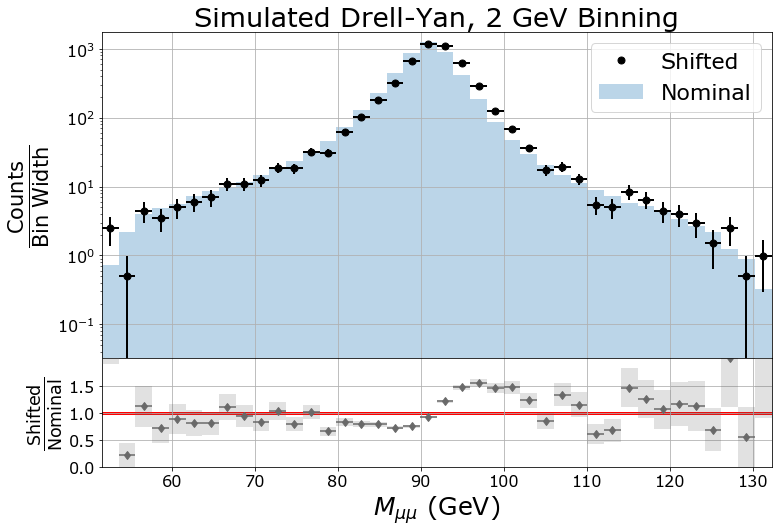

<Figure size 864x576 with 0 Axes>

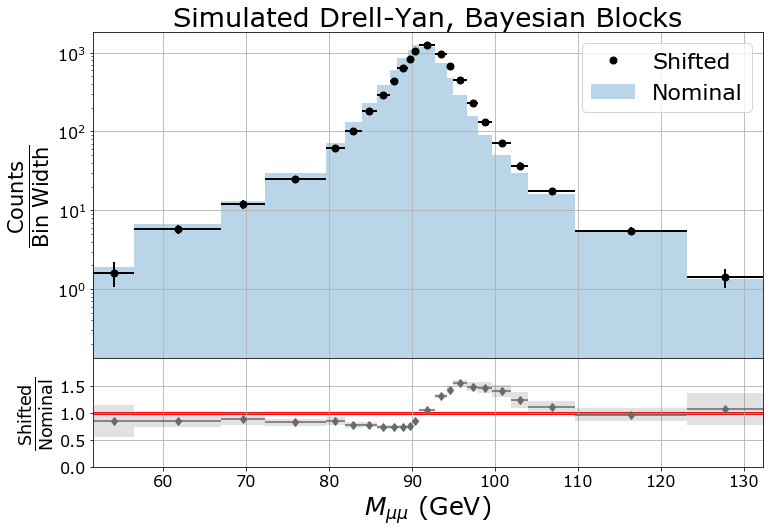

In [37]:
xlims = (data_shifted.min(), data_shifted.max())
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims, bins=int((xlims[1]-xlims[0])/2)
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, 2 GeV Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/b2gev_Z_shifted.pdf')

# plt.figure()
# _, bep = pd.qcut(data_shifted, 23, retbins=True)
# axes, hist1, hist2 = skh_plt.ratio_plot(
#     dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
#     dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
#     range=xlims, bins=bep
# )
# axes[0].grid(True)
# axes[1].grid(True)
# axes[0].legend(fontsize=22)
# 
# axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
# axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)
# 
# axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
# axes[0].set_title('Simulated Drell-Yan, Equal Population', fontsize=27)
# plt.savefig(bb_dir+'/plots/vis_examples/bep_Z_shifted.pdf')


plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_shifted,histtype='marker', markersize=7, bins='blocks', p0=0.05, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
    range=xlims
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Drell-Yan, Bayesian Blocks', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/bb_Z_shifted.pdf')

# plt.figure()
# axes, hist1, hist2 = skh_plt.ratio_plot(
#     dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
#     dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
#     range=xlims, bins='scott'
# )
# axes[0].grid(True)
# axes[1].grid(True)
# axes[0].legend(fontsize=22)
# 
# axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
# axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)
# 
# axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
# axes[0].set_title('Simulated Drell-Yan, Scott Binning', fontsize=27)
# plt.savefig(bb_dir+'/plots/vis_examples/bscott_Z_shifted.pdf')
# 
# plt.figure()
# axes, hist1, hist2 = skh_plt.ratio_plot(
#     dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
#     dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
#     range=xlims, bins='fd'
# )
# axes[0].grid(True)
# axes[1].grid(True)
# axes[0].legend(fontsize=22)
# 
# axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
# axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)
# 
# axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
# axes[0].set_title('Simulated Drell-Yan, Freedman Binning', fontsize=27)
# plt.savefig(bb_dir+'/plots/vis_examples/bfd_Z_shifted.pdf')
# 
# plt.figure()
# _, bk = knuth_bin_width(data_shifted, return_bins=True)
# axes, hist1, hist2 = skh_plt.ratio_plot(
#     dict(x=data_shifted,histtype='marker', markersize=7, color='k', errorbars=True, label='Shifted',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
#     dict(x=mc_nominal, weights=[n_events/len(mc_nominal)]*len(mc_nominal), histtype='stepfilled', alpha=0.3, label='Nominal', log=True, scale='binwidth'),
#     range=xlims, bins=bk
# )
# axes[0].grid(True)
# axes[1].grid(True)
# axes[0].legend(fontsize=22)
# 
# axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
# axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)
# 
# axes[1].set_xlabel(r'$M_{\mu\mu}$ (GeV)', fontsize=25)
# axes[0].set_title('Simulated Drell-Yan, Knuth Binning', fontsize=27)
# plt.savefig(bb_dir+'/plots/vis_examples/bk_Z_shifted.pdf')

### Jet Pt Plots

In [23]:
pt_data = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet1.p')
pt_data = pt_data.query('0<leading_jet_pT<800').reset_index().ix[0:10000]
pt_mc = pd.read_pickle(bb_dir+'/files/DY/ZLL_Jet3.p')
pt_mc = pt_mc.query('0<leading_jet_pT<800')
xlims = (pt_data.leading_jet_pT.min(), pt_data.leading_jet_pT.max())
ratlims = (0, 2.5)
n_events = len(pt_data)

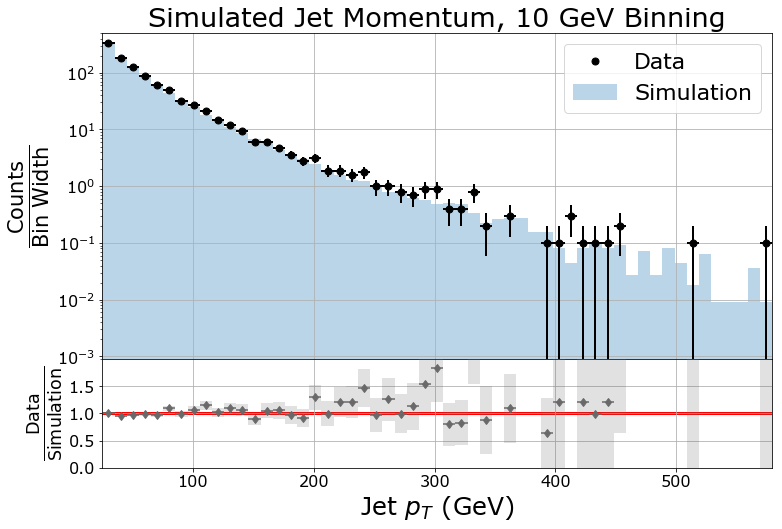

<Figure size 864x576 with 0 Axes>

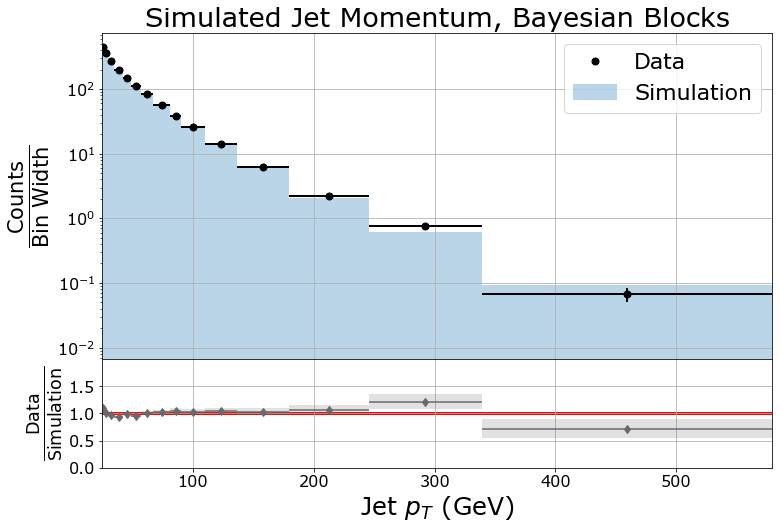

In [33]:
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins=int((xlims[1]-xlims[0])/10), logx=False
)

# axes[0].set_xticks([30, 50, 100, 200, 400])
# axes[0].get_xaxis().set_major_formatter(ScalarFormatter())
# axes[1].set_xticks([30, 50, 100, 200, 400])
# axes[1].get_xaxis().set_major_formatter(ScalarFormatter())

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, 10 GeV Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/b10gev_Jet_comp.pdf')

plt.figure()
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=pt_data.leading_jet_pT.values,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian', p0=0.01),
    dict(x=pt_mc.leading_jet_pT.values, weights=[n_events/len(pt_mc)]*(len(pt_mc)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins='blocks', logx=False
)

axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Data}{Simulation}}$', fontsize=25)

axes[1].set_xlabel(r'Jet $p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Jet Momentum, Bayesian Blocks', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/bb_Jet_comp.pdf')

### Muon Pt plots

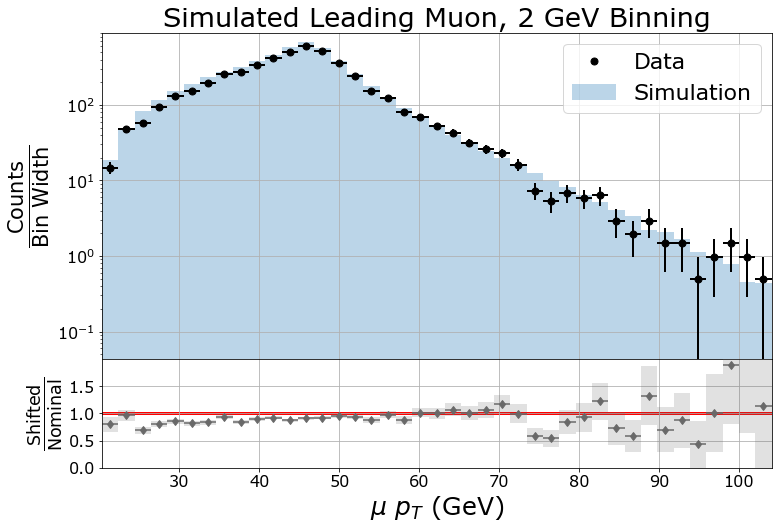

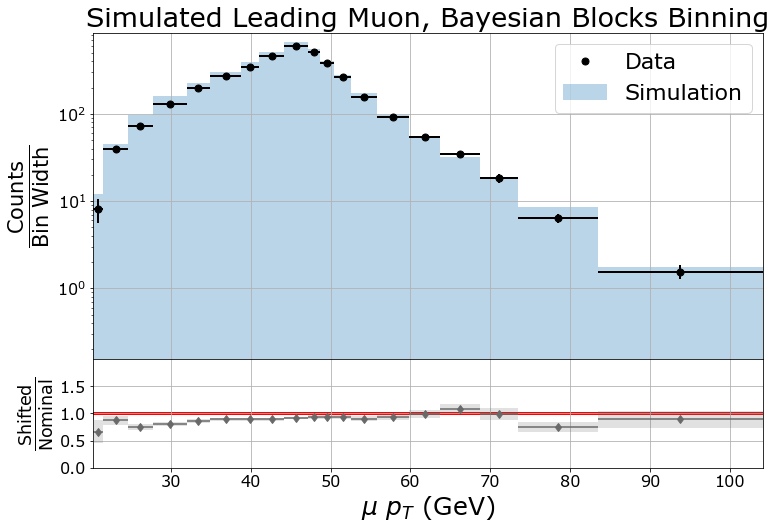

In [49]:
xlims = (data_pt.min(), data_pt.max())
mc_pt = np.sort(mc_pt)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_pt,histtype='marker', markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_pt, weights=[n_events/len(mc_pt)]*len(mc_pt)*np.linspace(1.2,1.02,len(mc_pt)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims, bins=int((xlims[1]-xlims[0])/2)
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$\mu\ p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Leading Muon, 2 GeV Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/b2gev_muon.pdf')

xlims = (data_pt.min(), data_pt.max())
mc_pt = np.sort(mc_pt)
axes, hist1, hist2 = skh_plt.ratio_plot(
    dict(x=data_pt,histtype='marker', bins='blocks', p0=0.05, markersize=7, color='k', errorbars=True, label='Data',alpha=1, log=True, scale='binwidth', err_type='gaussian'),
    dict(x=mc_pt, weights=[n_events/len(mc_pt)]*len(mc_pt)*np.linspace(1.2,1.02,len(mc_pt)), histtype='stepfilled', alpha=0.3, label='Simulation', log=True, scale='binwidth'),
    range=xlims,
)
axes[0].grid(True)
axes[1].grid(True)
axes[0].legend(fontsize=22)

axes[0].set_ylabel(r'$\mathrm{\frac{Counts}{Bin\ Width}}$', fontsize=30)
axes[1].set_ylabel(r'$\mathrm{\frac{Shifted}{Nominal}}$', fontsize=25)

axes[1].set_xlabel(r'$\mu\ p_{T}$ (GeV)', fontsize=25)
axes[0].set_title('Simulated Leading Muon, Bayesian Blocks Binning', fontsize=27)
plt.savefig(bb_dir+'/plots/vis_examples/bb_muon.pdf')
